In [1]:
import torch
import torchaudio
from pathlib import Path
from torch.utils.data import Dataset

In [2]:
file = Path('/home/musa/dev/who-opened-the-door/data/2024-04-03_15_07_57-part1.ogg')
file = Path('/home/musa/dev/who-opened-the-door/data/tmp1.ogg')
metadata = torchaudio.info(str(file))
sample_rate = metadata.sample_rate
n_frames = metadata.num_frames
n_channels = metadata.num_channels
encoding = metadata.encoding # VORBIS for .ogg files
sample_rate, n_frames, n_channels, encoding

(44100, 793800256, 2, 'VORBIS')

In [87]:
class AudioDataset(Dataset):
    def __init__(self, audio_file, metadata=None, chunk_size=50_000_000):
        audio_file = str(audio_file)
        self.audio_file = audio_file
        self.chunk_size = chunk_size
        
        if not metadata:
            metadata = torchaudio.info(audio_file)
            
        self.num_chunks = metadata.num_frames // chunk_size

    def __len__(self):
        return self.num_chunks

    def __getitem__(self, idx):
        start_frame = idx * self.chunk_size
        audio_chunk, _ = torchaudio.load(self.audio_file, frame_offset=start_frame, num_frames=self.chunk_size)
        return audio_chunk
audioDataset = AudioDataset(file, metadata)

In [81]:
wave = audioDataset[0]
# number of mb in the audio file:
len(wave.flatten()) * wave.element_size() / 1e6

400.0

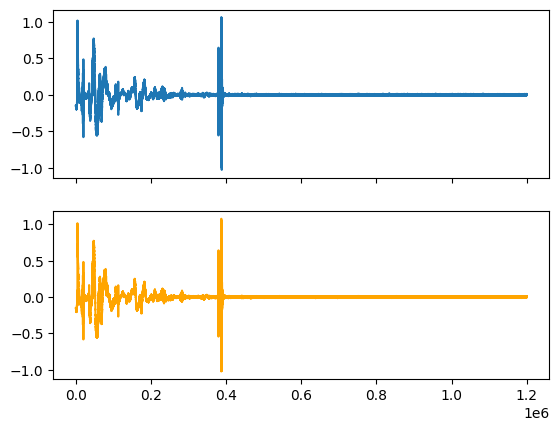

In [7]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(2, sharex=True)
axes[0].plot(wave[0,800000:2000000].numpy())
axes[1].plot(wave[1,800000:2000000].numpy(), color='orange')

In [93]:
for i in range(len(audioDataset)):
    wave = audioDataset[i]
    if torch.any(wave > 0.02):
        print(f'{i}, {wave.max()}')

0, 1.1389918327331543
1, 1.138932704925537
2, 1.131670594215393
3, 1.1572849750518799
4, 0.039071399718523026
5, 1.0742146968841553
6, 0.05100087821483612
7, 1.1171586513519287
8, 0.029938550665974617
9, 0.02922179363667965
10, 0.025239285081624985
11, 0.06633690744638443
12, 1.1299149990081787
13, 1.096661925315857
14, 0.0235043466091156


In [94]:
i=3
wave = audioDataset[i]

In [95]:
import pandas as pd
import numpy as np
from datetime import timedelta
import plotly.express as px

df = pd.DataFrame(wave.T, columns=['channel1', 'channel2'])
df.index = df.index + i*audioDataset.chunk_size
df['time_s'] = df.index / sample_rate
df = df[::500]
df['timedelta'] = df['time_s'].apply(lambda x: str(timedelta(seconds=x)))

fig = px.line(df, x='timedelta', y=['channel1', 'channel2'])
# update layout to show xticklabels as timedelta
# fig.update_layout(xaxis=dict(
#     tickmode='array', 
#     tickvals=df.index, 
#     ticktext=df['timedelta']
# ))
fig.show(renderer='browser')

Opening in existing browser session.


In [62]:
# manual labelling
labels = [
    {'start': '00:03:09', 'end': '00:03:11', 'label': 'Alireza'},
    {'start': '00:41:08', 'end': '00:41:10', 'label': 'Hamed'},
    {'start': '00:52:42', 'end': '00:52:44', 'label': 'Musa'},
    # ...
]

Opening in existing browser session.
